# Question 1: Markdown Skills

## Title

### Section 1: Different fonts

Regular. **Bold**. *Italic.*

### Section 2: Enumeration

- First bullet
- Second bullet
    1. A
    2. B
- Third bullet
    - Sub-bullet
    - Sub-bullet

### Section 3: Code

This is inline code: `[x*x for x in X]`, and this is a block of code (note the syntax highlighting!):

In [3]:
# comment
def foo(x,y,z):
    return x + 10 * y + 100 * z

# Question 2: Decision Trees

## Data Validation and Environment Set Up

In [4]:
#set up environment
import pandas as pd
import numpy as np

#reading and printing the file
def print_file(filename):
    with open(filename) as f:
        print(f.read(),end='')

In [5]:
filename = 'student-por.csv'
print_file(filename)

# separating data with semicolon, print data
data = pd.read_csv(filename, sep=';')
print(data)

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;4;"0";"11";11
"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;2;"9";"11";11
"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;0;"yes";"no";"no";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;6;"12";"13";12
"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"no";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;0;"14";"14";14
"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"no";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;0;"11";"13";13
"GP";"M";16;"U";"LE3";"T";4;3;"services";"other";"reputation";"

In [6]:
# checking data types to see which are object and which are integers
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Data Cleaning

In [7]:
# count missing entries in a column
for x in data.columns:
    missing = pd.isnull(data[x]).sum()
    print(f'{missing} missing entries in {x}')
# therefore no missing entries, no data cleaning required

0 missing entries in school
0 missing entries in sex
0 missing entries in age
0 missing entries in address
0 missing entries in famsize
0 missing entries in Pstatus
0 missing entries in Medu
0 missing entries in Fedu
0 missing entries in Mjob
0 missing entries in Fjob
0 missing entries in reason
0 missing entries in guardian
0 missing entries in traveltime
0 missing entries in studytime
0 missing entries in failures
0 missing entries in schoolsup
0 missing entries in famsup
0 missing entries in paid
0 missing entries in activities
0 missing entries in nursery
0 missing entries in higher
0 missing entries in internet
0 missing entries in romantic
0 missing entries in famrel
0 missing entries in freetime
0 missing entries in goout
0 missing entries in Dalc
0 missing entries in Walc
0 missing entries in health
0 missing entries in absences
0 missing entries in G1
0 missing entries in G2
0 missing entries in G3


In [8]:
#change data to numerical attributes by replacing object types with numbers using lambda function
# I chose to skip Mjob, Fjob, reason and guardian as I wanted to use the other features instead

data["school"] = data["school"].apply(lambda x: 1 if x == 'GP' else 0)
data["sex"] = data["sex"].apply(lambda x: 1 if x == 'F' else 0)
data["address"] = data["address"].apply(lambda x: 1 if x == 'U' else 0)
data["famsize"] = data["famsize"].apply(lambda x: 1 if x == 'LE3' else 0)
data["Pstatus"] = data["Pstatus"].apply(lambda x: 1 if x == 'T' else 0)
data["schoolsup"] = data["schoolsup"].apply(lambda x: 1 if x == 'yes' else 0)
data["famsup"] = data["famsup"].apply(lambda x: 1 if x == 'yes' else 0)
data["paid"] = data["paid"].apply(lambda x: 1 if x == 'yes' else 0)
data["activities"] = data["activities"].apply(lambda x: 1 if x == 'yes' else 0)
data["nursery"] = data["nursery"].apply(lambda x: 1 if x == 'yes' else 0)
data["higher"] = data["higher"].apply(lambda x: 1 if x == 'yes' else 0)
data["internet"] = data["internet"].apply(lambda x: 1 if x == 'yes' else 0)
data["romantic"] = data["romantic"].apply(lambda x: 1 if x == 'yes' else 0)

## Making Decision Trees (Imports)

In [9]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## For Loop for Training With Features and Nodes

In [10]:
features = [['higher', 'internet', 'schoolsup'], ['higher', 'internet', 'schoolsup', 'studytime', 'failures', 'address'], ['higher', 'internet', 'schoolsup', 'studytime', 'failures', 'address',  'famsup', 'absences', 'paid']]
leaves = [5, 10, 15, 20]

y = data['G3']


#empty lists for my for loop to fill up
nodes_used = []
features_used = []
accuracies = []

# for loop to run through features, nodes, split the data into train and test, and calculate accuracy score for each through the Decision Tree Classifier
for f in features:
    for l in leaves:
        x = data[f]
        xtrain, xtest, ytrain, ytest = train_test_split(x,y)
        my_clf = tree.DecisionTreeClassifier(max_leaf_nodes = l)
        my_clf.fit(xtrain, ytrain)
        predval = my_clf.predict(xtest)
        accuracy = accuracy_score(ytest, predval)
        nodes_used += [l]
        features_used += [len(f)]
        accuracies += [accuracy]

#checking to make sure correct number of nodes and features, and accuracies are changing
print(nodes_used)
print(features_used)
print(accuracies)

[5, 10, 15, 20, 5, 10, 15, 20, 5, 10, 15, 20]
[3, 3, 3, 3, 6, 6, 6, 6, 9, 9, 9, 9]
[0.15337423312883436, 0.1411042944785276, 0.09202453987730061, 0.12883435582822086, 0.20245398773006135, 0.17177914110429449, 0.147239263803681, 0.1411042944785276, 0.147239263803681, 0.15337423312883436, 0.17177914110429449, 0.1165644171779141]


## Plotting Data 3D

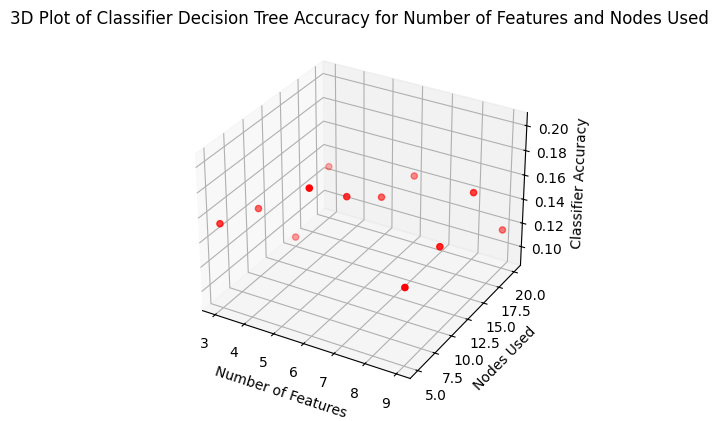

In [11]:
# imports for 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#plotting figure
figure = plt.figure()
ax = figure.add_subplot(111, projection = '3d')
ax.scatter(features_used, nodes_used, accuracies, color='red')

#making labels and title
ax.set_title('3D Plot of Classifier Decision Tree Accuracy for Number of Features and Nodes Used')
ax.set_xlabel('Number of Features')
ax.set_ylabel('Nodes Used')
ax.set_zlabel('Classifier Accuracy')

plt.show()


## Question 3 and Summary

This homework helped me learn a lot about how to use Jupyter Notebook, how to create decision trees, and plot them. I also brushed up my for loop skills and was able to learn about the different imported packages like Seaborn, Matplotlib, and sklearn accuracy scores. I have realised that data needs to be validated and cleaned before use, like with techniques like lambda functions, and fill(na) (that I did not have to use as the data did not have any missing entries). In the future, I will be sure to check my data and create data frames to better understand if I need to change or fix anything. 
In terms of the decision tree itself, I chose to use a classifier instead of a regressor. While I could have used either, the classifier fit this data better in my opinion for categorical values. The results from the Classification tree were very interesting, and showed some trends on the 3D plot, depsite all the accuracies being quite low. Firstly, it seems that a lower number of features produced lower accuracy, and the most accurate run was with 6 features and 5 nodes. All the trees with 3 features seemed not to have learned enough to produce high accuracies, and too many features also led to low accuracies which could mean the classifier was overfitting. Additionally, a higher number of features tended to improve the accuracies like 6 or 9 features, with lower numbers of nodes like 5 or 10 leaves, as those had my highest accuracies of 21.47% and 19.63% respectively.
In terms of applying decision trees for predictive data analysis, this project helped me learn that it really depends on the data you have and what size of tree you have. You have to find the sweet spot in between too many or too little leaves, and too many or too little leaves to prevent the classifier from overfitting or not learning enough. 
In the future, I would like to experiment more with the data by changing different features and possibly comparing classifier and regressor models to see which does better in terms of accuracy. 

Question 3: 
- I spent around 7 hours on this homework. 